In [ ]:
mkdir dataset

mkdir: cannot create directory ‘dataset’: File exists


In [ ]:
mkdir dataset/orig

mkdir: cannot create directory ‘dataset/orig’: File exists


In [ ]:
!gdown --id 1Ruf5M3kQ2X6pFlKg2-WGAMjQBfBDl5NZ

Permission denied: https://drive.google.com/uc?id=1aFUHW1qvknywfOyrh1CT0hm8RttanEzS
Maybe you need to change permission over 'Anyone with the link'?


In [ ]:
!unzip "/content/Breast Cancer.zip" -d "/content/dataset/orig"

Archive:  /content/Breast Cancer.zip
replace /content/dataset/orig/10253/0/10253_idx5_x1001_y1001_class0.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import os

INPUT_DATASET = "/content/drive/MyDrive/Untitled folder/886456"

BASE_PATH = "dataset/idc"
TRAIN_PATH = os.path.sep.join([BASE_PATH, "training"])
VAL_PATH = os.path.sep.join([BASE_PATH, "validation"])
TEST_PATH = os.path.sep.join([BASE_PATH, "testing"])

TRAIN_SPLIT = 0.8
VAL_SPLIT = 0.1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math,shutil,glob

In [ ]:
root_dir = "/content/drive/MyDrive/Untitled folder/886456"
number_of_images = {}

for dir in os.listdir(root_dir):
  number_of_images[dir] = len(os.listdir(os.path.join(root_dir,dir)))

number_of_images.items()


dict_items([('0', 4587), ('1', 834)])

In [ ]:
number_of_images.items()

dict_items([('0', 4587), ('1', 834)])

In [ ]:
if not os.path.exists("./train"):
  os.mkdir("./train")

  for dir in os.listdir(root_dir):
    os.makedirs("./train/"+dir)

    for img in np.random.choice(a= os.listdir(os.path.join(root_dir,dir)), size=(math.floor(70/100*number_of_images[dir])-5),replace=False):
      O = os.path.join(root_dir,dir,img)
      D = os.path.join("./train",dir)
      os.remove(O)
else:
  print("folder exists")

folder exists


In [ ]:
if not os.path.exists("./test"):
  os.mkdir("./test")

  for dir in os.listdir(root_dir):
    os.makedirs("./test/"+dir)

    for img in np.random.choice(a= os.listdir(os.path.join(root_dir,dir)), size=(math.floor(30/100*number_of_images[dir])-5),replace=False):
      O = os.path.join(root_dir,dir,img)
      D = os.path.join("./test",dir)
      os.remove(O)
else:
  print("folder exists")

folder exists


In [ ]:
if not os.path.exists("./val"):
  os.mkdir("./val")

  for dir in os.listdir(root_dir):
    os.makedirs("./val/"+dir)

    for img in np.random.choice(a= os.listdir(os.path.join(root_dir,dir)), size=(math.floor(70/100*number_of_images[dir])-5),replace=False):
      O = os.path.join(root_dir,dir,img)
      D = os.path.join("./val",dir)
      os.remove(O)
else:
  print("folder exists")

folder exists


In [ ]:
def datafolder(P, split):

   if not os.path.exists("./"+P):
    os.mkdir("./"+P)

    for dir in os.listdir(root_dir):
      os.makedirs("./"+P+"/"+dir)
      for img in np.random.choice(a=os.listdir(os.path.join(root_dir,dir)),size=(math.floor(split*number_of_images[dir])-5),replace = False):
        O = os.path.join(root_dir,dir,img)
        D = os.path.join("./"+P,dir)
        shutil.copy(O,D)
        
    else:
        print(f"{P} folder exist")

In [ ]:
datafolder("TRAIN_PATH", 0.7)

TRAIN_PATH folder exist


In [ ]:
datafolder("TEST_PATH",0.3)

TEST_PATH folder exist


In [ ]:
datafolder("VAL_PATH",0.15)

VAL_PATH folder exist


In [ ]:
number_of_images = {}

for dir in os.listdir(root_dir):
  number_of_images[dir] = len(os.listdir(os.path.join(root_dir,dir)))

number_of_images.items()

dict_items([('0', 4587), ('1', 834)])

#Model Building 

In [ ]:
import keras
from keras.layers.convolutional import Conv2D
from keras.models import sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Flatten,Dropout


In [ ]:
from keras.layers import MaxPool2D

In [ ]:
#CNN Model

model = sequential.Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape = (224,224,3)))

model.add(Conv2D(filters=36, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))#to avoid over fitting
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 110, 110, 36)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 52, 52, 128)      

In [ ]:
model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

In [ ]:
  def imageprocess(path):

    image_data = ImageDataGenerator(zoom_range=0.2,shear_range=0.2,rescale=1/255,horizontal_flip=True)
    image = image_data.flow_from_directory(directory= path, target_size = (224,224), batch_size = 32, class_mode = 'binary')

    return image 

In [ ]:
path = "/content/TEST_PATH"
train_data = imageprocess(path)

Found 1616 images belonging to 2 classes.


In [ ]:
  def imageprocess2(path):

    image_data = ImageDataGenerator(rescale=1/255)
    image = image_data.flow_from_directory(directory= path, target_size = (224,224), batch_size = 32, class_mode = 'binary')

    return image 

In [ ]:
path = "/content/VAL_PATH"
val_data = imageprocess2(path)

Found 803 images belonging to 2 classes.


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor="val_accuracy", min_delta = 0.01 ,patience=6, verbose=1,mode='auto')
mc = ModelCheckpoint(monitor="val_accuracy",filepath ="./bestmodel.h5",verbose=1, save_best_only= True,mode='auto')
cd =[es,mc]

In [ ]:
hs = model.fit_generator(generator = train_data, steps_per_epoch =5 , epochs = 10, verbose = 1, validation_data = val_data, validation_steps = 16, callbacks = cd)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
5/5 [==============================] - ETA: 0s - loss: 1.1906 - accuracy: 0.6875
Epoch 00001: val_accuracy improved from -inf to 0.84180, saving model to ./bestmodel.h5
5/5 [==============================] - 46s 10s/step - loss: 1.1906 - accuracy: 0.6875 - val_loss: 0.3874 - val_accuracy: 0.8418
Epoch 2/10
5/5 [==============================] - ETA: 0s - loss: 0.4039 - accuracy: 0.8500
Epoch 00002: val_accuracy did not improve from 0.84180
5/5 [==============================] - 47s 10s/step - loss: 0.4039 - accuracy: 0.8500 - val_loss: 0.4080 - val_accuracy: 0.8379
Epoch 3/10
5/5 [==============================] - ETA: 0s - loss: 0.4218 - accuracy: 0.8000
Epoch 00003: val_accuracy improved from 0.84180 to 0.89258, saving model to ./bestmodel.h5
5/5 [==============================] - 45s 10s/step - loss: 0.4218 - accuracy: 0.8000 - val_loss: 0.4563 - val_accuracy: 0.8926
Epoch 4/10
5/5 [==============================] - ETA: 0s - loss: 0.4030 - accuracy: 0.8500
Epoch 00004: v

In [ ]:
h = hs.history
h.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

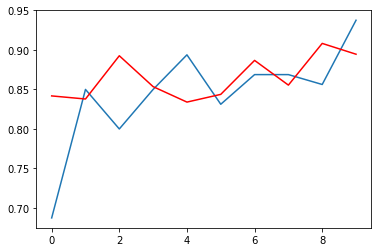

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c="red")
plt.show()

In [ ]:
#rm -rf TEST_PATH/

In [ ]:
#rm -rf TRAIN_PATH/

In [ ]:
#rm -rf VAL_PATH/

In [ ]:
from keras.models import load_model
model = load_model("/content/bestmodel.h5")

In [ ]:
path = "/content/TEST_PATH"
test_data = imageprocess2(path)

Found 1616 images belonging to 2 classes.


In [ ]:
acc = model.evaluate_generator(test_data)[1]
print(f"the accuracy of the model is {acc}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


the accuracy of the model is 0.9077970385551453


In [ ]:
from keras_preprocessing.image import load_img, img_to_array

tumor detected


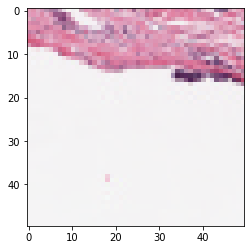

In [ ]:
path ="/content/drive/MyDrive/Untitled folder/886456/0/8863_idx5_x1001_y2051_class0.png"
img = load_img(path, target_size=(224,224))
input_arr = img_to_array(img)/255
input_arr.shape
input_arr = np.expand_dims(input_arr, axis=0)
#pred = model.predict_classes(input_arr)[0][0]
predictions = (model.predict(input_arr) > 0.5).astype("int32")[0][0]

predictions

if predictions==0:
  print("tumor detected")
else:
  print("No tumor detected")
image = plt.imread(path)
plt.imshow(image)
plt.show()